In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline
data = pd.read_csv("Weather.csv",nrows=1000)
data.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180,83.9


In [2]:
data = pd.get_dummies(data)
X = data.values

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(1000, 87)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
X.shape

(1000, 2)

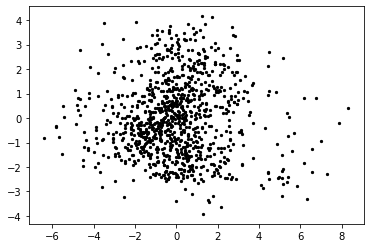

In [5]:
plt.scatter(X[:,0],X[:,1],c="black",s=5)

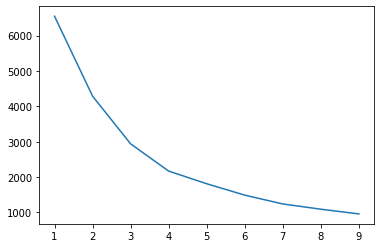

In [6]:
err = []
for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(X)
    err.append(km.inertia_)
plt.plot(range(1,10),err)

[[ 0.17644914 -1.11787997]
 [ 3.74583039 -0.62930804]
 [ 0.40991714  1.74386521]
 [-2.39972902 -0.32257518]]


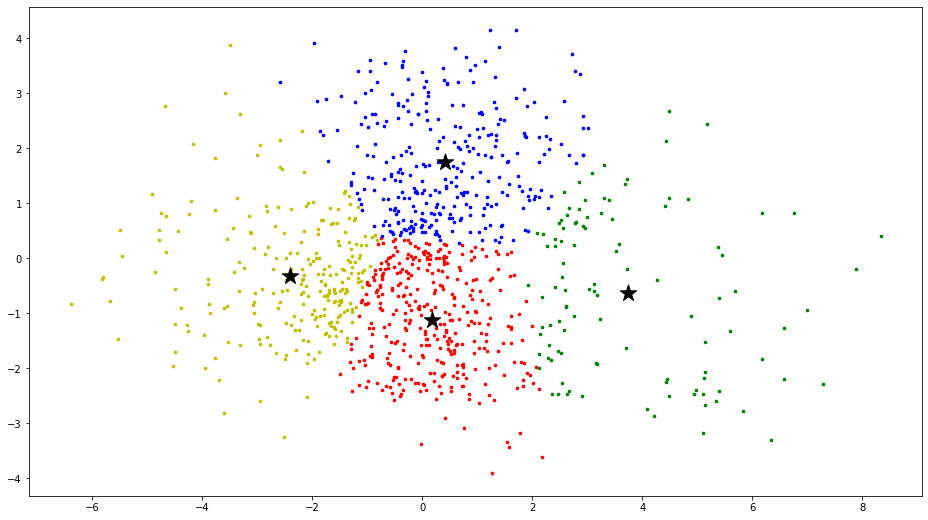

In [10]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
k=4
plt.rcParams["figure.figsize"]=(16,9)
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
cls = kmeans.predict(X)
C = kmeans.cluster_centers_
print(C)
colors = ['r','g','b','y','c','m','black']
fig,ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if cls[j] == i ])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(C[:,0],C[:,1], marker="*", s=300, c="#050505")